In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('Algerian_forest_fires_dataset.csv', skiprows=1)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [4]:
# Missing Values 
dataset.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [5]:
dataset[dataset.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [6]:
dataset.columns


Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
# Create the Region column based on row index
dataset["Region"] = (dataset.index >= 123).astype(int)

In [8]:
dataset.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire          0  
1  not fire          0  
2  not fire          0  
3  not fire          0  
4  not fire          0

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [10]:
dataset = dataset.dropna()


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [12]:
dataset.tail()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
241  6.5       fire          1  
242    0   not fire          1  
243  0.2   not fire          1  
244  0.7   not fire          1  
245  0.5  not fire           1

In [13]:
dataset = dataset.reset_index(drop=True)

In [14]:
dataset.tail()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
239  6.5       fire          1  
240    0   not fire          1  
241  0.2   not fire          1  
242  0.7   not fire          1  
243  0.5  not fire           1

In [15]:
## Dropping The Columns
dataset = dataset.drop(columns=["day", "month", "year"])


In [16]:
dataset.head()

Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI    Classes    \
0          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5  not fire      
1          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4  not fire      
2          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire      
3          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0  not fire      
4          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5  not fire      

   Region  
0       0  
1       0  
2       0  
3       0  
4       0

In [19]:
dataset.columns = dataset.columns.str.strip()

In [20]:
dataset['Classes'] = np.where(dataset['Classes'].str.strip() == "fire", 1, 0)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  244 non-null    object
 1   RH           244 non-null    object
 2   Ws           244 non-null    object
 3   Rain         244 non-null    object
 4   FFMC         244 non-null    object
 5   DMC          244 non-null    object
 6   DC           244 non-null    object
 7   ISI          244 non-null    object
 8   BUI          244 non-null    object
 9   FWI          244 non-null    object
 10  Classes      244 non-null    int64 
 11  Region       244 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 23.0+ KB


In [23]:
dataset.iloc[122]


Temperature    Temperature
RH                      RH
Ws                      Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes                  0
Region                   1
Name: 122, dtype: object

In [24]:
dataset = dataset.drop(index=122).reset_index(drop=True)

In [25]:
int_cols = ["Temperature", "RH", "Ws"]
dataset[int_cols] = dataset[int_cols].astype(int)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  243 non-null    int64 
 1   RH           243 non-null    int64 
 2   Ws           243 non-null    int64 
 3   Rain         243 non-null    object
 4   FFMC         243 non-null    object
 5   DMC          243 non-null    object
 6   DC           243 non-null    object
 7   ISI          243 non-null    object
 8   BUI          243 non-null    object
 9   FWI          243 non-null    object
 10  Classes      243 non-null    int64 
 11  Region       243 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 22.9+ KB


In [29]:
float_cols = ["Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]
dataset[float_cols] = dataset[float_cols].astype(float)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [32]:
dataset.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index=False)

In [33]:
dataset['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

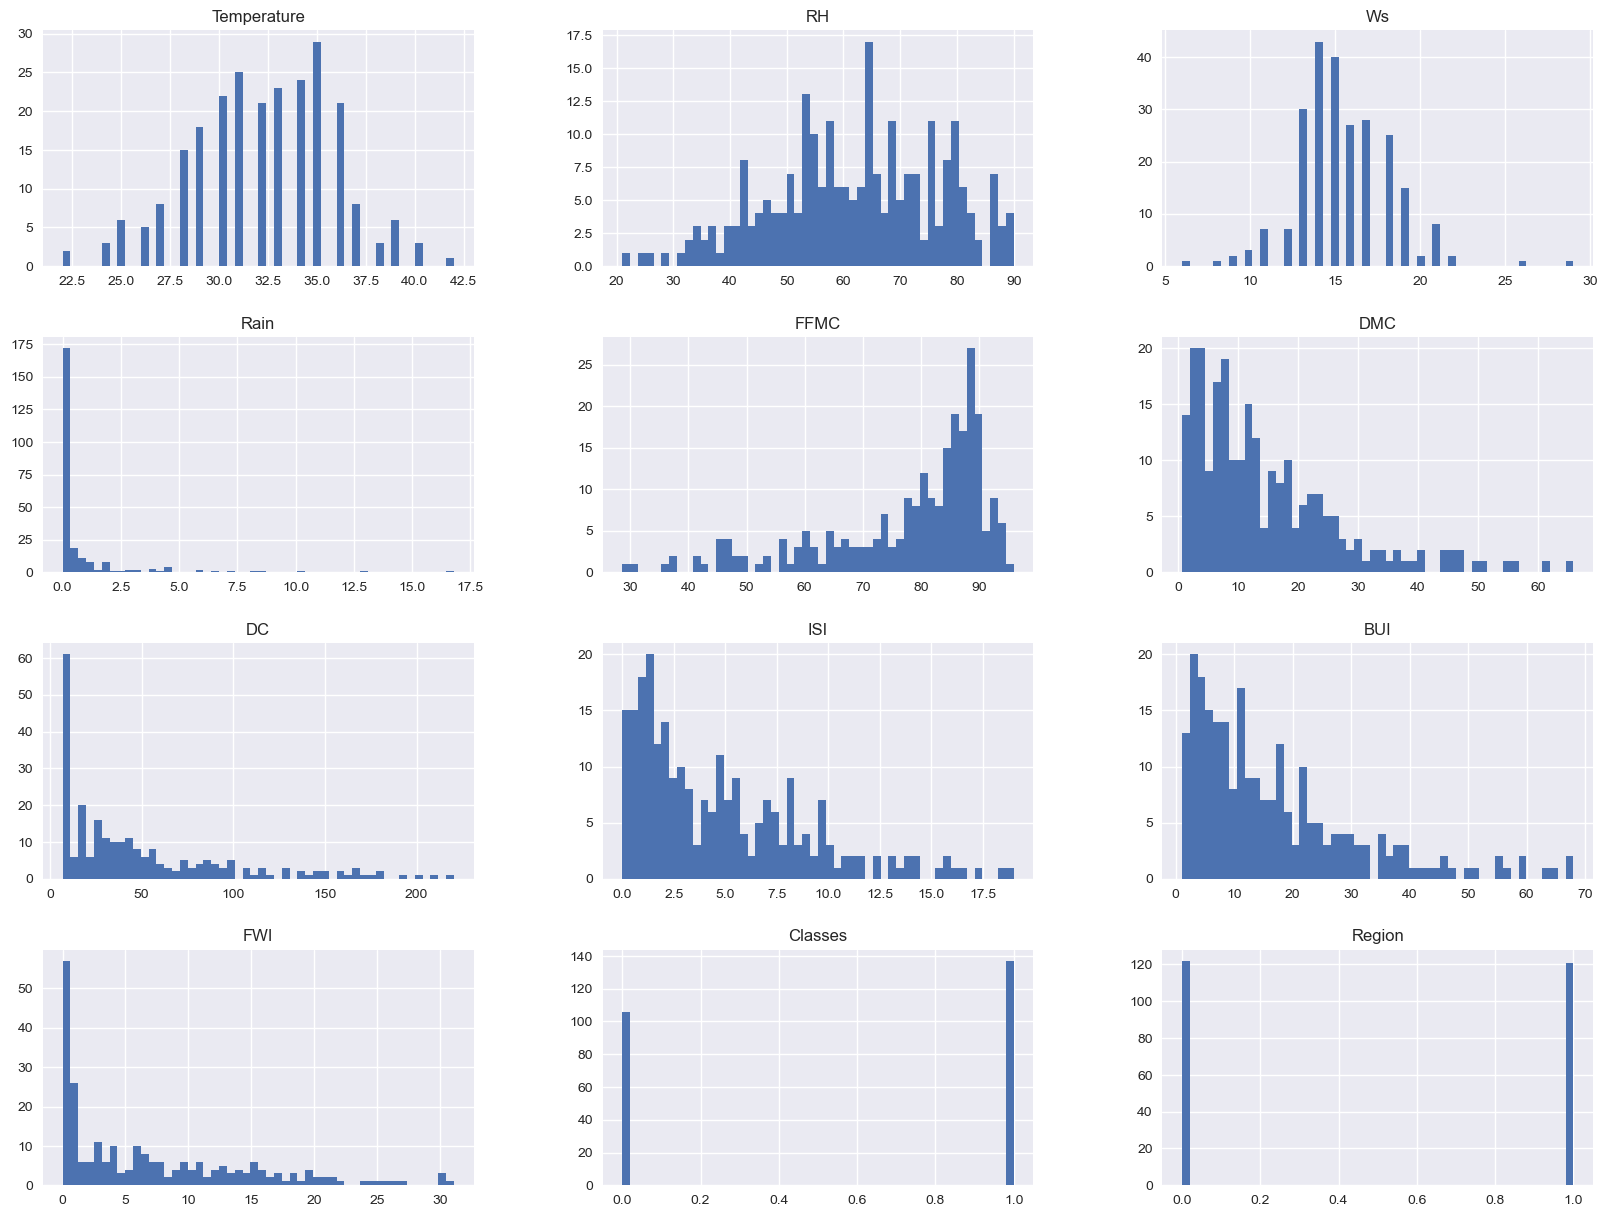

In [37]:
## Plot density for all features
plt.style.use('seaborn-v0_8')
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [38]:
dataset.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.651400 -0.284510 -0.326492  0.676568  0.485687   
RH             -0.651400  1.000000  0.244048  0.222356 -0.644873 -0.408519   
Ws             -0.284510  0.244048  1.000000  0.171506 -0.166548 -0.000721   
Rain           -0.326492  0.222356  0.171506  1.000000 -0.543906 -0.288773   
FFMC            0.676568 -0.644873 -0.166548 -0.543906  1.000000  0.603608   
DMC             0.485687 -0.408519 -0.000721 -0.288773  0.603608  1.000000   
DC              0.376284 -0.226941  0.079135 -0.298023  0.507397  0.875925   
ISI             0.603871 -0.686667  0.008532 -0.347484  0.740007  0.680454   
BUI             0.459789 -0.353841  0.031438 -0.299852  0.592011  0.982248   
FWI             0.566670 -0.580957  0.032368 -0.324422  0.691132  0.875864   
Classes         0.516015 -0.432161 -0.069964 -0.379097  0.769492  0.585658   
Region          0.269555 -0.402682 -0.181160 -0.040013  0.222241  0.192089   

                   DC       ISI       BUI       FWI   Classes    Region  
Temperature  0.376284  0.603871  0.459789  0.566670  0.516015  0.269555  
RH          -0.226941 -0.686667 -0.353841 -0.580957 -0.432161 -0.402682  
Ws           0.079135  0.008532  0.031438  0.032368 -0.069964 -0.181160  
Rain        -0.298023 -0.347484 -0.299852 -0.324422 -0.379097 -0.040013  
FFMC         0.507397  0.740007  0.592011  0.691132  0.769492  0.222241  
DMC          0.875925  0.680454  0.982248  0.875864  0.585658  0.192089  
DC           1.000000  0.508643  0.941988  0.739521  0.511123 -0.078734  
ISI          0.508643  1.000000  0.644093  0.922895  0.735197  0.263197  
BUI          0.941988  0.644093  1.000000  0.857973  0.586639  0.089408  
FWI          0.739521  0.922895  0.857973  1.000000  0.719216  0.197102  
Classes      0.511123  0.735197  0.586639  0.719216  1.000000  0.162347  
Region      -0.078734  0.263197  0.089408  0.197102  0.162347  1.000000

<Axes: >

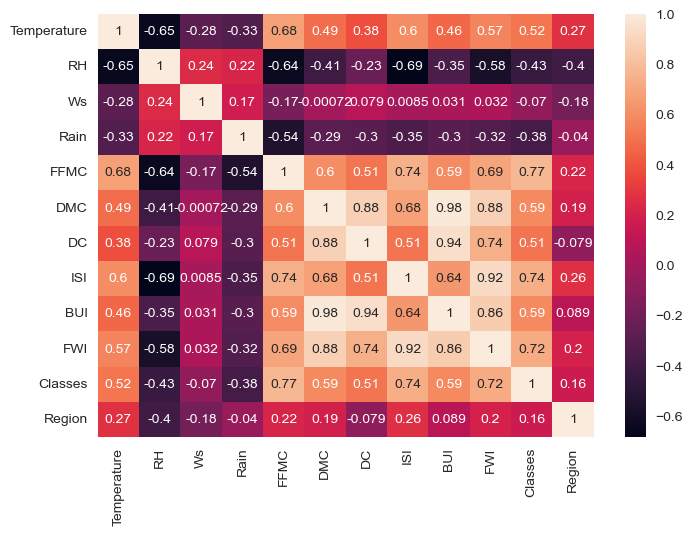

In [40]:
sns.heatmap(dataset.corr(), annot=True)